## Assignments for Week-03

### 1. Re-code the titanic machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*

## 2. Answer following questions:


###### 1. Why we need machine learning methods instead of creating a complicated formula?


Ans：穷举所有的可能性以及人工寻找适应的方程消耗的时间人力成本太大。ML可以很快给出适合的结果并且在高维参数情况下会有很好的表现。

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:搜索成本太大，浪费了大量的无用搜索。

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:起到了剪枝的作用，减少无用搜索。但高维情况下实际上direction的本身的情况也很多，作用就很小。

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:适应各种类型的方程，各种高维情况，只需要对loss函数进行选择修改可以很快找到收敛函数。

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度下降算法。梯度是对于标量场的上升下降趋势的度量，下降是选择向误差更小，即变化速率更小的方向趋近。

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:不受变量x的维度限制，搜索效率高，优化调试的空间大。

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:自适应的反馈调节过程。

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-April-20

>Submit: Submit the source code and result to github. 



#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package requests page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is get station information of all the subway lines;

> e.	You may need install @package beautiful soup  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> a.	Build the search agent based on the graph we build.

> b.	As much as you can to use the already implemented search agent. You just need to define the is_goal, get_successor, strategy three functions. 


##### 4.	Create different policies for transfer system.

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


## Coding of Beijing Subway station

In [8]:
from bs4 import BeautifulSoup, Comment

In [9]:
import requests
import re

In [10]:
url = 'http://www.bjsubway.com/station/xltcx/'

In [11]:
response = requests.get(url).content.decode('gbk')

regular expression

In [12]:
soup = BeautifulSoup(response, 'html.parser')

In [13]:
for s in soup("span"):
    s.extract()

In [14]:
for element in soup(text=lambda text: isinstance(text, Comment)):
    element.extract()

#print(soup.prettify())

In [15]:
soup.find_all("div",class_=re.compile("subway_num\d+"))

[<div class="subway_num1">1号线</div>,
 <div class="subway_num3">2号线</div>,
 <div class="subway_num4">4号线</div>,
 <div class="subway_num6">5号线</div>,
 <div class="subway_num7">6号线</div>,
 <div class="subway_num18">7号线</div>,
 <div class="subway_num8">8号线</div>,
 <div class="subway_num9">9号线</div>,
 <div class="subway_num10">10号线</div>,
 <div class="subway_num11">13号线</div>,
 <div class="subway_num17">14号线</div>,
 <div class="subway_num12">15号线</div>,
 <div class="subway_num19">16号线</div>,
 <div class="subway_num2">八通线</div>,
 <div class="subway_num14">昌平线</div>,
 <div class="subway_num15">亦庄线</div>,
 <div class="subway_num13">房山线</div>,
 <div class="subway_num16">机场线</div>,
 <div class="subway_num5">大兴线</div>,
 <div class="subway_num5" style="background-color:#B35A20;">S1线</div>]

In [16]:
items = soup.select("div.line_name div")

In [17]:
items = soup.find('div', class_="line_content").children
type(items)

list_iterator

In [18]:
list_of_tag = []
for i in items:
    if i != '\n':
        list_of_tag.append(i)
#print(list_of_tag)

In [19]:
list_of_tag[0].text

'\n1号线\n'

In [20]:
re_line = re.compile(r"<div class=\"subway_num\d+\">(?P<line>(\w+[\u4e00-\u9fa5]+|[\u4e00-\u9fa5]+))")

In [21]:
my = re.search(re_line,str(list_of_tag[0]))

In [22]:
print(my)

<re.Match object; span=(24, 52), match='<div class="subway_num1">1号线'>


In [23]:
my.group('line')

'1号线'

In [24]:
subway_list = []
test_pattern = re.compile(r"<div class=\"subway_num5\" style=\"background-color:#B35A20;\">S1线</div>")
for element in list_of_tag:
    search_line = re.search(re_line, str(element))
    if search_line != None:
        line_name = search_line.group('line')
    else:
        if re.search(test_pattern,str(element)) != None:
            line_name = "S1线"
        else:
            subway_list.append([element.text, line_name])
print(subway_list)

[['苹果园', '1号线'], ['古城', '1号线'], ['八角游乐园', '1号线'], ['八宝山', '1号线'], ['玉泉路', '1号线'], ['五棵松', '1号线'], ['万寿路', '1号线'], ['公主坟', '1号线'], ['军事博物馆', '1号线'], ['木樨地', '1号线'], ['南礼士路', '1号线'], ['复兴门', '1号线'], ['西单', '1号线'], ['天安门西', '1号线'], ['天安门东', '1号线'], ['王府井', '1号线'], ['东单', '1号线'], ['建国门', '1号线'], ['永安里', '1号线'], ['国贸', '1号线'], ['大望路', '1号线'], ['四惠', '1号线'], ['四惠东', '1号线'], ['西直门', '2号线'], ['积水潭', '2号线'], ['鼓楼大街', '2号线'], ['安定门', '2号线'], ['雍和宫', '2号线'], ['东直门', '2号线'], ['东四十条', '2号线'], ['朝阳门', '2号线'], ['建国门', '2号线'], ['北京站', '2号线'], ['崇文门', '2号线'], ['前门', '2号线'], ['和平门', '2号线'], ['宣武门', '2号线'], ['长椿街', '2号线'], ['复兴门', '2号线'], ['阜成门', '2号线'], ['车公庄', '2号线'], ['安河桥北', '4号线'], ['北宫门', '4号线'], ['西苑', '4号线'], ['圆明园', '4号线'], ['北京大学东门', '4号线'], ['中关村', '4号线'], ['海淀黄庄', '4号线'], ['人民大学', '4号线'], ['魏公村', '4号线'], ['国家图书馆', '4号线'], ['动物园', '4号线'], ['西直门', '4号线'], ['新街口', '4号线'], ['平安里', '4号线'], ['西四', '4号线'], ['灵境胡同', '4号线'], ['西单', '4号线'], ['宣武门', '4号线'], ['菜市口', '4号线'], ['陶然亭', '4号线'], ['北京南站', '4号线'

In [25]:
# {"subway_line":[station1,station2]}的dict方便之后的换乘搜索
subway_lines_dict = {}
old_line = subway_list[0][1]
line_list = []
for ele in subway_list:
    if ele == subway_list[-1]:
        subway_lines_dict.setdefault(old_line,line_list)
    new_line = ele[1]
    if new_line == old_line:
        line_list.append(ele[0])
    else:
        subway_lines_dict.setdefault(old_line,line_list)
        line_list = []
        line_list.append(ele[0])
        old_line = new_line
print(subway_lines_dict)

{'1号线': ['苹果园', '古城', '八角游乐园', '八宝山', '玉泉路', '五棵松', '万寿路', '公主坟', '军事博物馆', '木樨地', '南礼士路', '复兴门', '西单', '天安门西', '天安门东', '王府井', '东单', '建国门', '永安里', '国贸', '大望路', '四惠', '四惠东'], '2号线': ['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门', '东四十条', '朝阳门', '建国门', '北京站', '崇文门', '前门', '和平门', '宣武门', '长椿街', '复兴门', '阜成门', '车公庄'], '4号线': ['安河桥北', '北宫门', '西苑', '圆明园', '北京大学东门', '中关村', '海淀黄庄', '人民大学', '魏公村', '国家图书馆', '动物园', '西直门', '新街口', '平安里', '西四', '灵境胡同', '西单', '宣武门', '菜市口', '陶然亭', '北京南站', '马家堡', '角门西', '公益西桥'], '5号线': ['宋家庄', '刘家窑', '蒲黄榆', '天坛东门', '磁器口', '崇文门', '东单', '灯市口', '东四', '张自忠路', '北新桥', '雍和宫', '和平里北街', '和平西桥', '惠新西街南口', '惠新西街北口', '大屯路东', '北苑路北', '立水桥南', '立水桥', '天通苑南', '天通苑', '天通苑北'], '6号线': ['金安桥', '苹果园', '杨庄', '西黄村', '廖公庄', '田村', '海淀五路居', '慈寿寺', '花园桥', '白石桥南', '车公庄西', '车公庄', '平安里', '北海北', '南锣鼓巷', '东四', '朝阳门', '东大桥', '呼家楼', '金台路', '十里堡', '青年路', '褡裢坡', '黄渠', '常营', '草房', '物资学院路', '通州北关', '通运门', '北运河西', '北运河东', '郝家府', '东夏园', '潞城'], '7号线': ['北京西站', '湾子', '达官营', '广安门内', '菜市口', '虎坊桥', '珠市口', '桥湾', '磁器口', '

In [26]:
import networkx as nx

In [27]:
# 给出所有的站点数据
subway_station = []
for ele in subway_list:
    subway_station.append(ele[0])
subway_station

['苹果园',
 '古城',
 '八角游乐园',
 '八宝山',
 '玉泉路',
 '五棵松',
 '万寿路',
 '公主坟',
 '军事博物馆',
 '木樨地',
 '南礼士路',
 '复兴门',
 '西单',
 '天安门西',
 '天安门东',
 '王府井',
 '东单',
 '建国门',
 '永安里',
 '国贸',
 '大望路',
 '四惠',
 '四惠东',
 '西直门',
 '积水潭',
 '鼓楼大街',
 '安定门',
 '雍和宫',
 '东直门',
 '东四十条',
 '朝阳门',
 '建国门',
 '北京站',
 '崇文门',
 '前门',
 '和平门',
 '宣武门',
 '长椿街',
 '复兴门',
 '阜成门',
 '车公庄',
 '安河桥北',
 '北宫门',
 '西苑',
 '圆明园',
 '北京大学东门',
 '中关村',
 '海淀黄庄',
 '人民大学',
 '魏公村',
 '国家图书馆',
 '动物园',
 '西直门',
 '新街口',
 '平安里',
 '西四',
 '灵境胡同',
 '西单',
 '宣武门',
 '菜市口',
 '陶然亭',
 '北京南站',
 '马家堡',
 '角门西',
 '公益西桥',
 '宋家庄',
 '刘家窑',
 '蒲黄榆',
 '天坛东门',
 '磁器口',
 '崇文门',
 '东单',
 '灯市口',
 '东四',
 '张自忠路',
 '北新桥',
 '雍和宫',
 '和平里北街',
 '和平西桥',
 '惠新西街南口',
 '惠新西街北口',
 '大屯路东',
 '北苑路北',
 '立水桥南',
 '立水桥',
 '天通苑南',
 '天通苑',
 '天通苑北',
 '金安桥',
 '苹果园',
 '杨庄',
 '西黄村',
 '廖公庄',
 '田村',
 '海淀五路居',
 '慈寿寺',
 '花园桥',
 '白石桥南',
 '车公庄西',
 '车公庄',
 '平安里',
 '北海北',
 '南锣鼓巷',
 '东四',
 '朝阳门',
 '东大桥',
 '呼家楼',
 '金台路',
 '十里堡',
 '青年路',
 '褡裢坡',
 '黄渠',
 '常营',
 '草房',
 '物资学院路',
 '通州北关',
 '通运门',
 '北运河西',
 '北运河东',
 '郝家府',
 '东夏园',
 '潞

In [28]:
subway_graph = nx.Graph()

In [29]:
subway_graph.add_nodes_from(subway_station)

In [30]:
from collections import defaultdict

In [31]:
old_key = "old key"
old_value = "old value"
edge_list = []
for ele in subway_list:
    if old_key == "old key":
        old_key = ele[0]
        old_value = ele[1]
        continue
    new_key = ele[0]
    new_value = ele[1]
    if new_value == old_value:
        edge_list.append((old_key,new_key))
        old_key = new_key
    else:
        old_key = new_key
        old_value = new_value

In [32]:
#edge_list

In [204]:
#建立一个类似lecture中的city_connection以适应search中的代码
station_connection = defaultdict(list)

In [206]:
for ele in edge_list:
    station_connection[ele[0]].append(ele[1])
    station_connection[ele[1]].append(ele[0])
print(station_connection)

defaultdict(<class 'list'>, {'苹果园': ['古城', '金安桥', '杨庄'], '古城': ['苹果园', '八角游乐园'], '八角游乐园': ['古城', '八宝山'], '八宝山': ['八角游乐园', '玉泉路'], '玉泉路': ['八宝山', '五棵松'], '五棵松': ['玉泉路', '万寿路'], '万寿路': ['五棵松', '公主坟'], '公主坟': ['万寿路', '军事博物馆', '莲花桥', '西钓鱼台'], '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'], '木樨地': ['军事博物馆', '南礼士路'], '南礼士路': ['木樨地', '复兴门'], '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'], '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'], '天安门西': ['西单', '天安门东'], '天安门东': ['天安门西', '王府井'], '王府井': ['天安门东', '东单'], '东单': ['王府井', '建国门', '崇文门', '灯市口'], '建国门': ['东单', '永安里', '朝阳门', '北京站'], '永安里': ['建国门', '国贸'], '国贸': ['永安里', '大望路', '金台夕照', '双井'], '大望路': ['国贸', '四惠', '九龙山', '朝阳公园'], '四惠': ['大望路', '四惠东', '四惠东'], '四惠东': ['四惠', '四惠', '高碑店'], '西直门': ['积水潭', '动物园', '新街口', '大钟寺'], '积水潭': ['西直门', '鼓楼大街'], '鼓楼大街': ['积水潭', '安定门', '安德里北街', '什刹海'], '安定门': ['鼓楼大街', '雍和宫'], '雍和宫': ['安定门', '东直门', '北新桥', '和平里北街'], '东直门': ['雍和宫', '东四十条', '柳芳', '三元桥'], '东四十条': ['东直门', '朝阳门'], '朝阳门': ['东四十条', '建国门', '东四', '东大桥'], '北京站': ['建国门', '崇文门'], '崇文门': ['北京站', '

In [35]:
subway_graph.add_edges_from(edge_list)

In [36]:
subway_graph.edges

EdgeView([('苹果园', '古城'), ('苹果园', '金安桥'), ('苹果园', '杨庄'), ('古城', '八角游乐园'), ('八角游乐园', '八宝山'), ('八宝山', '玉泉路'), ('玉泉路', '五棵松'), ('五棵松', '万寿路'), ('万寿路', '公主坟'), ('公主坟', '军事博物馆'), ('公主坟', '莲花桥'), ('公主坟', '西钓鱼台'), ('军事博物馆', '木樨地'), ('军事博物馆', '北京西站'), ('军事博物馆', '白堆子'), ('木樨地', '南礼士路'), ('南礼士路', '复兴门'), ('复兴门', '西单'), ('复兴门', '长椿街'), ('复兴门', '阜成门'), ('西单', '天安门西'), ('西单', '灵境胡同'), ('西单', '宣武门'), ('天安门西', '天安门东'), ('天安门东', '王府井'), ('王府井', '东单'), ('东单', '建国门'), ('东单', '崇文门'), ('东单', '灯市口'), ('建国门', '永安里'), ('建国门', '朝阳门'), ('建国门', '北京站'), ('永安里', '国贸'), ('国贸', '大望路'), ('国贸', '金台夕照'), ('国贸', '双井'), ('大望路', '四惠'), ('大望路', '九龙山'), ('大望路', '朝阳公园'), ('四惠', '四惠东'), ('四惠东', '高碑店'), ('西直门', '积水潭'), ('西直门', '动物园'), ('西直门', '新街口'), ('西直门', '大钟寺'), ('积水潭', '鼓楼大街'), ('鼓楼大街', '安定门'), ('鼓楼大街', '安德里北街'), ('鼓楼大街', '什刹海'), ('安定门', '雍和宫'), ('雍和宫', '东直门'), ('雍和宫', '北新桥'), ('雍和宫', '和平里北街'), ('东直门', '东四十条'), ('东直门', '柳芳'), ('东直门', '三元桥'), ('东四十条', '朝阳门'), ('朝阳门', '东四'), ('朝阳门', '东大桥'), ('北京站', '崇文门'), ('崇文门', '前门'), ('

In [58]:
subway_nodes = subway_graph.nodes

In [59]:
import matplotlib.pyplot as plt

In [60]:
plt.rcParams['font.sans-serif'] = ['SimHei']

C:\Users\Xraigor\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


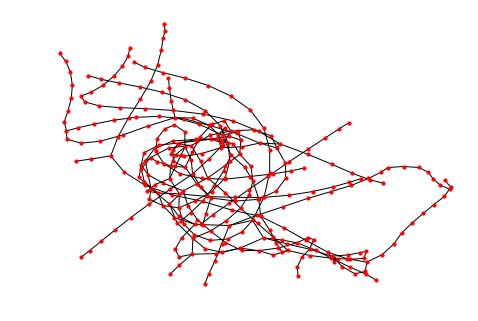

In [62]:
nx.draw(subway_graph,with_labals=True, node_size = 10)

In [41]:
def is_goal(destination):
    def _warp(current_path):
        return current_path[-1] == destination
    return _warp

In [42]:
is_goal('复兴门')

<function __main__.is_goal.<locals>._warp(current_path)>

In [358]:
#代码复现
def search(graph, start, is_goal, search_strategy):
    """
    CS212 course
    """
    pathes = [[start] ]
    seen = set()
    
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        
        if frontier in seen: continue
        
        successors = graph[frontier]
        
        for station_test in successors:
            if station_test in path: continue
            
            new_path = path+[station_test]
            
            pathes.append(new_path)
            
            #、if city == destination: return new_path
            
            if is_goal(new_path): return new_path
        
        # print('len(pathes) = {}'.format(pathes))
        seen.add(frontier)
        pathes = search_strategy(pathes)
    
    return "no path"
        
#        print("standing on {} Looking forward{}".format(frontier, successors))
        

#    return true

In [359]:
search(subway_graph, start = '人民大学', is_goal = is_goal('西单'), search_strategy = lambda n:n)

['人民大学', '魏公村', '国家图书馆', '白石桥南', '车公庄西', '车公庄', '阜成门', '复兴门', '西单']

In [360]:
def sort_path(cmp_func, beam=-1):
    def _sorted(pathes):
        return sorted(pathes, key=cmp_func)[:beam]
    return _sorted

In [361]:
def get_total_station(path):
    return len(path)

In [362]:
station_in_line = {}

In [363]:
for ele in subway_list:
    if station_in_line.__contains__(ele[0]):
        old_val = station_in_line.get(ele[0])
        new_val = [ele[1],old_val]
        station_in_line[ele[0]] = new_val
    else:
        station_in_line.setdefault(ele[0],ele[1])
for key,value in station_in_line.items():
    if value[-1][-1] != "线":
        station_in_line[key] = [value[0],value[-1][0],value[-1][-1]]
station_in_line

{'苹果园': ['6号线', '1号线'],
 '古城': '1号线',
 '八角游乐园': '1号线',
 '八宝山': '1号线',
 '玉泉路': '1号线',
 '五棵松': '1号线',
 '万寿路': '1号线',
 '公主坟': ['10号线', '1号线'],
 '军事博物馆': ['9号线', '1号线'],
 '木樨地': '1号线',
 '南礼士路': '1号线',
 '复兴门': ['2号线', '1号线'],
 '西单': ['4号线', '1号线'],
 '天安门西': '1号线',
 '天安门东': '1号线',
 '王府井': '1号线',
 '东单': ['5号线', '1号线'],
 '建国门': ['2号线', '1号线'],
 '永安里': '1号线',
 '国贸': ['10号线', '1号线'],
 '大望路': ['14号线', '1号线'],
 '四惠': ['八通线', '1号线'],
 '四惠东': ['八通线', '1号线'],
 '西直门': ['13号线', '4号线', '2号线'],
 '积水潭': '2号线',
 '鼓楼大街': ['8号线', '2号线'],
 '安定门': '2号线',
 '雍和宫': ['5号线', '2号线'],
 '东直门': ['机场线', '13号线', '2号线'],
 '东四十条': '2号线',
 '朝阳门': ['6号线', '2号线'],
 '北京站': '2号线',
 '崇文门': ['5号线', '2号线'],
 '前门': '2号线',
 '和平门': '2号线',
 '宣武门': ['4号线', '2号线'],
 '长椿街': '2号线',
 '阜成门': '2号线',
 '车公庄': ['6号线', '2号线'],
 '安河桥北': '4号线',
 '北宫门': '4号线',
 '西苑': ['16号线', '4号线'],
 '圆明园': '4号线',
 '北京大学东门': '4号线',
 '中关村': '4号线',
 '海淀黄庄': ['10号线', '4号线'],
 '人民大学': '4号线',
 '魏公村': '4号线',
 '国家图书馆': ['9号线', '4号线'],
 '动物园': '4号线',
 '新街口': '4号线',
 '平安里'

In [364]:
def get_whether_trans(station1, station2, station3, pre_line = None):
    if station1 == station2 or station2 == station3 or station1 == station3:
        return 0
    line_1_2 = None
    line_2_3 = None
    line_1_3 = None
    for k,v in subway_lines_dict.items():
        if station1 in v and station2 in v and station3 in v:
            #print("all in {}".format(k))
            return 0
        # line 1
        if station1 in v and station2 in v:
            line_1_2 = k
        if station2 in v and station3 in v:
            line_2_3 = k
        if station3 in v and station1 in v:
            line_1_3 = k
    if line_1_2 != line_2_3 or line_2_3 != line_1_3 or line_1_3 != line_1_2:
        #print("change_line")
        return 1

In [365]:
get_whether_trans("圆明园","北京大学东门","王府井")

1

In [366]:
def get_trans_number(path):
    num = 0
    #print("find a path")
    for i,c in enumerate(path[:-1]):
        num += get_whether_trans(c, path[i+1], path[i-1])
    #print(num)
    return num

In [367]:
def get_comprehensive_path(path):
    return get_trans_number(path) + get_total_station(path)

In [368]:
search(station_connection, start='平西府', is_goal=is_goal('东风北桥'),search_strategy = lambda n:n)

['平西府', '回龙观东大街', '霍营', '立水桥', '北苑', '望京西', '望京', '阜通', '高家园', '东风北桥']

In [369]:
search(station_connection, start='西钓鱼台', is_goal=is_goal('湾子'),search_strategy=sort_path(get_trans_number))

'no path'

In [370]:
search(station_connection, start='平西府', is_goal=is_goal('北海北'),search_strategy=sort_path(get_comprehensive_path))

'no path'